In [7]:
import os
import sys
import time 
from pathlib import Path

import uproot

import matplotlib.pyplot as plt
import mplhep as hep

print("All import loaded")

All import loaded


In [8]:
# client = Client("tls://localhost:8786")

In [23]:
# client.close()

In [11]:
HOME_DIR = Path(os.environ.get("HOME", "/home/cms-jovyan"))
PROJECT_NAME = "H-to-WW-NanoAOD-analysis"

PROJECT_DIR = HOME_DIR / PROJECT_NAME
AUX_DIR = PROJECT_DIR / "Auxillary_files"

print(f"HOME_DIR:         {HOME_DIR}")
print(f"PROJECT_DIR:     {PROJECT_DIR}")
print(f"AUX_DIR:         {AUX_DIR}")


HOME_DIR:         /home/cms-jovyan
PROJECT_DIR:     /home/cms-jovyan/H-to-WW-NanoAOD-analysis
AUX_DIR:         /home/cms-jovyan/H-to-WW-NanoAOD-analysis/Auxillary_files


In [16]:
for files in os.listdir(AUX_DIR):
    if files.endswith("root"):
        print(f"- {files}")

- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt.root
- NUM_TightHWW_DEN_TrackerMuons_eta_pt.root


In [98]:
iso_root_file = "NUM_TightHWW_ISO_DEN_TightHWW_eta_pt.root"
tID_root_file = "NUM_TightHWW_DEN_TrackerMuons_eta_pt.root"
iso_file_path = AUX_DIR/ iso_root_file
tight_file_path = AUX_DIR/ tID_root_file

# with uproot.open(iso_root_file) as iso
iso = uproot.open(iso_file_path)
tight= uproot.open(tight_file_path)

In [45]:
# print(iso.classnames())

In [107]:
for name, classname in iso.classnames().items():    
    if ("data" in name.lower()) or ("mc" in name.lower()):
        print(f"-{name:<75} | {classname}")


-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData;1                       | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_AltSig;1                | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_AltSig_syst;1           | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_combined_syst;1         | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massBin;1               | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massBin_syst;1          | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massRange;1             | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massRange_syst;1        | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_stat;1                  | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_syst;1                  | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_tagIso;1                | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_tagIso_syst;1          

---
The three histograms which seems useful are:
- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData
- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyMC

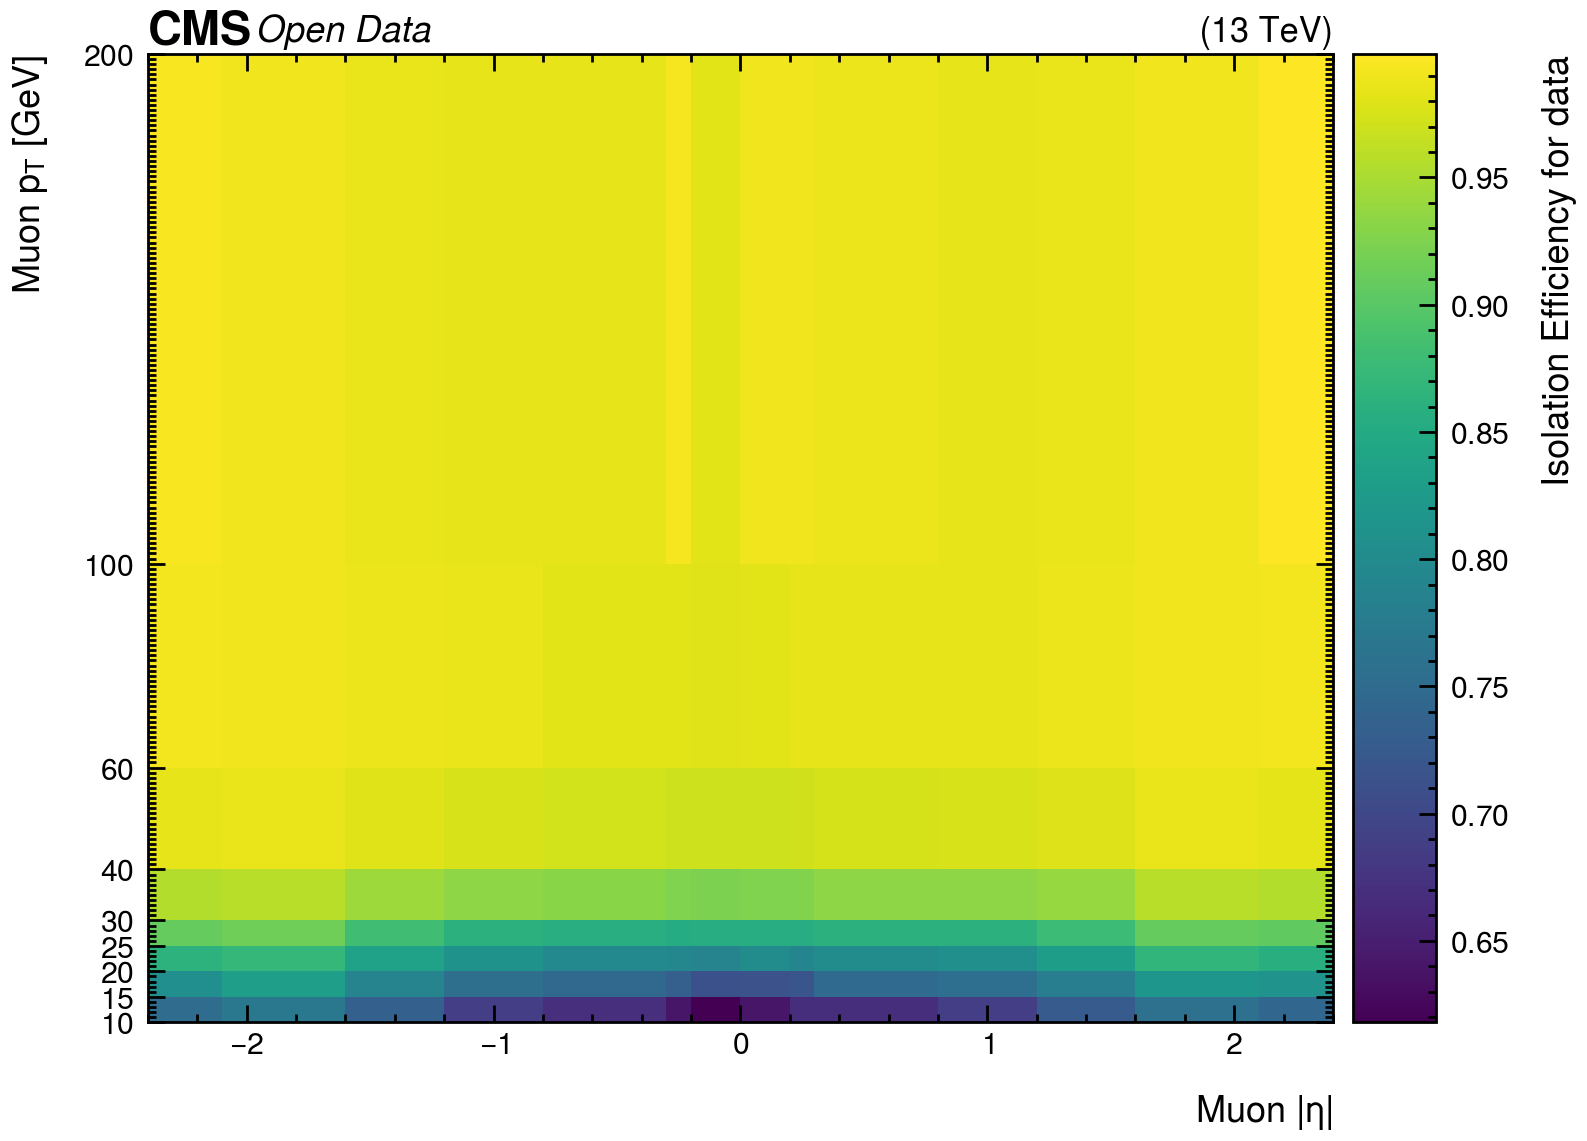

In [81]:
hep.style.use("CMS")

iso_effdata_hist = iso['NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(iso_effdata_hist,ax= ax, cbar = True, cmap= "viridis")

mesh.cbar.set_label("Isolation Efficiency for data", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
ax.set_xlabel(r"Muon $|\eta|$")
ax.set_ylabel(r"Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()



In [68]:
print(iso_effdata_hist.values())

# Eta bin edges
print(iso_effdata_hist.axes[0].edges)

# pT bin edges
print(iso_effdata_hist.axes[1].edges)


[[0.75074893 0.80613965 0.86323744 0.90897548 0.95463443 0.98381817
  0.99240094 0.99548876]
 [0.77106267 0.83055341 0.87101227 0.91388786 0.95775688 0.98598582
  0.99031335 0.99010324]
 [0.73351711 0.78914142 0.8368668  0.88217211 0.94237965 0.97997802
  0.98670346 0.98609048]
 [0.68749255 0.7560479  0.81038243 0.86111075 0.93348736 0.97518146
  0.98605865 0.98400939]
 [0.66907012 0.74553561 0.79769558 0.85643649 0.93119872 0.97297645
  0.98214078 0.98462254]
 [0.63942534 0.73113322 0.79472828 0.8519935  0.92558753 0.96892136
  0.98131335 0.99258572]
 [0.61801612 0.71303588 0.79039627 0.85450786 0.9234972  0.96897727
  0.98043472 0.98133963]
 [0.63946551 0.71354377 0.80101049 0.85458237 0.92486316 0.96913713
  0.98124862 0.98961294]
 [0.66750389 0.71720672 0.79108369 0.85486072 0.92714733 0.9717142
  0.98461187 0.99096304]
 [0.66719383 0.74764353 0.80090743 0.86172539 0.93334079 0.97410095
  0.98447782 0.9875741 ]
 [0.68773949 0.75351238 0.80783617 0.86118287 0.93322325 0.9753226
  0.

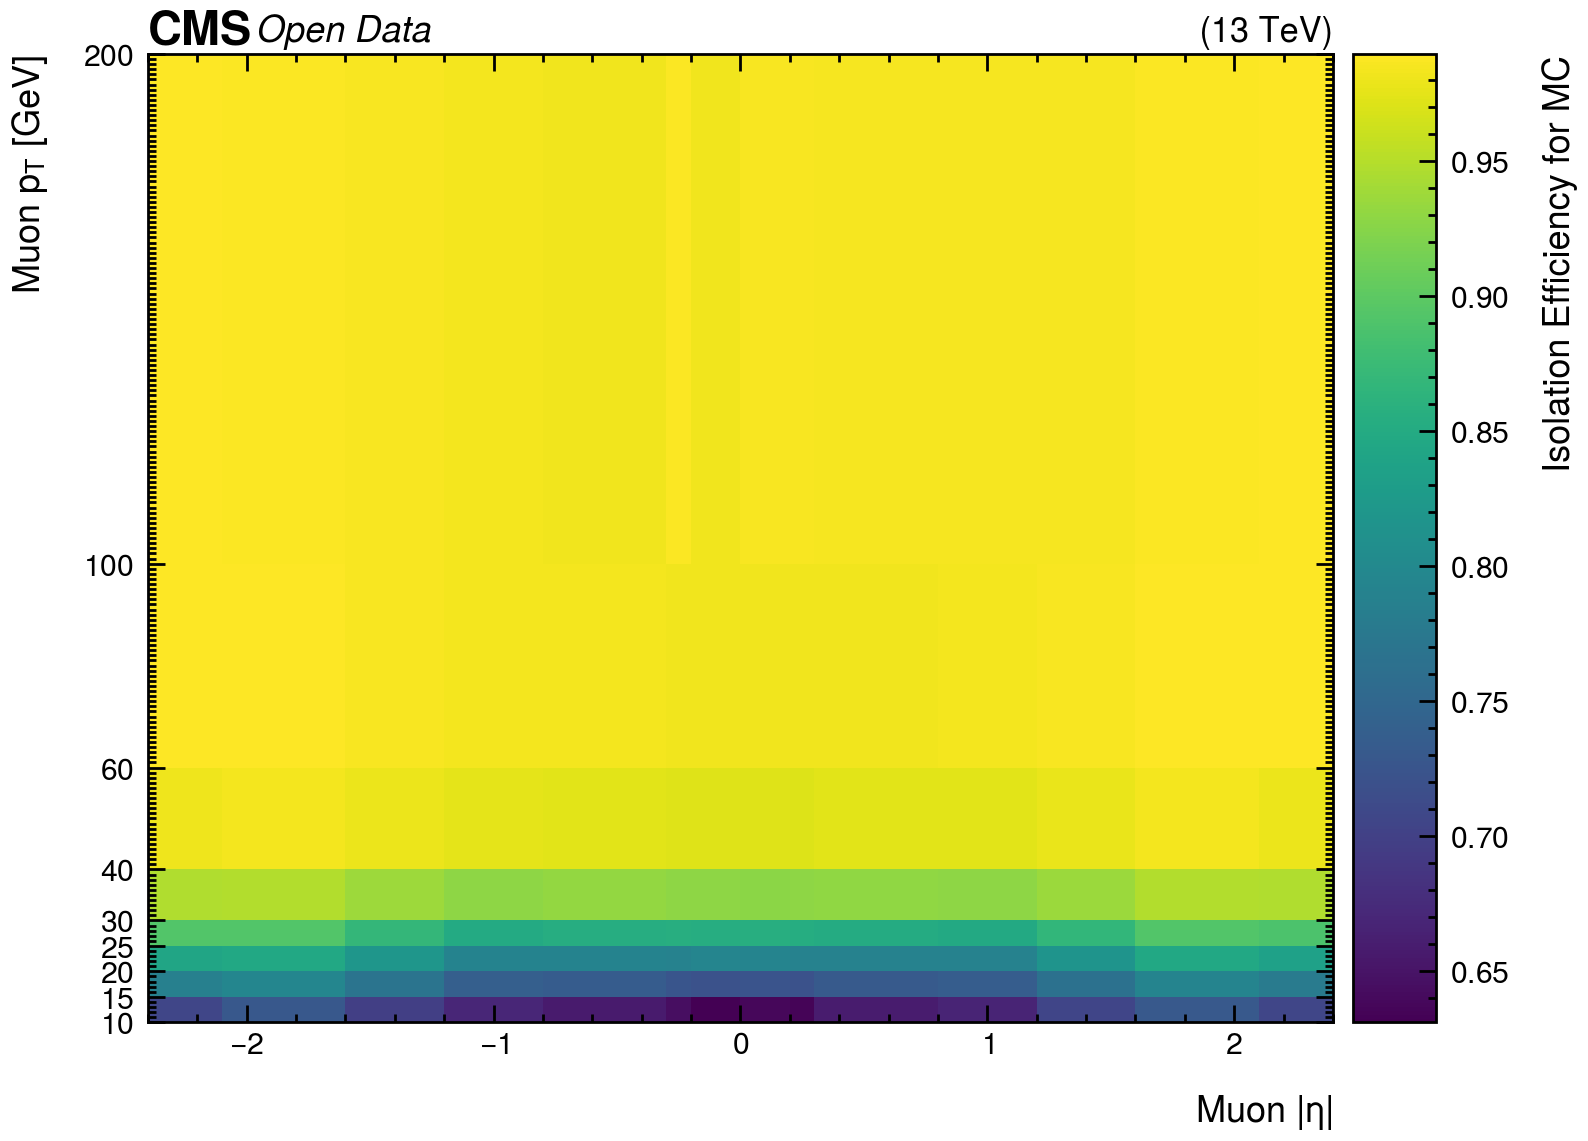

In [91]:
# hep.style.use("CMS")

iso_effMC = iso['NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyMC'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(iso_effMC,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Isolation Efficiency for MC", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()



In [78]:
print(iso_effMC.values())

[[0.70638245 0.78528315 0.84167409 0.89279652 0.94689745 0.9804129
  0.988307   0.98962718]
 [0.72814161 0.79601556 0.84611523 0.89185017 0.94865716 0.98287094
  0.98853981 0.98734641]
 [0.69697428 0.76940936 0.82005638 0.86849922 0.93645781 0.97903508
  0.98586899 0.98633546]
 [0.66918576 0.73847198 0.79109412 0.84897029 0.92888218 0.97434801
  0.98381925 0.98392999]
 [0.65714329 0.73431671 0.79089075 0.85449737 0.93125898 0.97376281
  0.98321754 0.98227435]
 [0.64432627 0.72615397 0.78940964 0.85558867 0.9285785  0.97238308
  0.98159033 0.98719347]
 [0.63092446 0.72086298 0.79386771 0.8550936  0.9284938  0.97188675
  0.98224598 0.98203617]
 [0.63673908 0.72458559 0.79216367 0.85577428 0.92770833 0.97189468
  0.98207361 0.98580533]
 [0.63468254 0.72061431 0.78893137 0.85310471 0.9286477  0.97140127
  0.98156691 0.98613018]
 [0.65767151 0.73152912 0.78915739 0.85069764 0.9301669  0.97336262
  0.98256069 0.98403394]
 [0.66695112 0.73540384 0.7888329  0.84742415 0.92892981 0.97393185
  0

## FOR TIGHT ID 

In [110]:
for name, classname in tight.classnames().items():    
    if ("data" in name.lower()) or ("mc" in name.lower()):
        print(f"-{name:<75} | {classname}")


-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData;1                       | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_AltSig;1                | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_AltSig_syst;1           | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_combined_syst;1         | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massBin;1               | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massBin_syst;1          | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massRange;1             | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massRange_syst;1        | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_stat;1                  | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_syst;1                  | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_tagIso;1                | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_tagIso_syst;1          

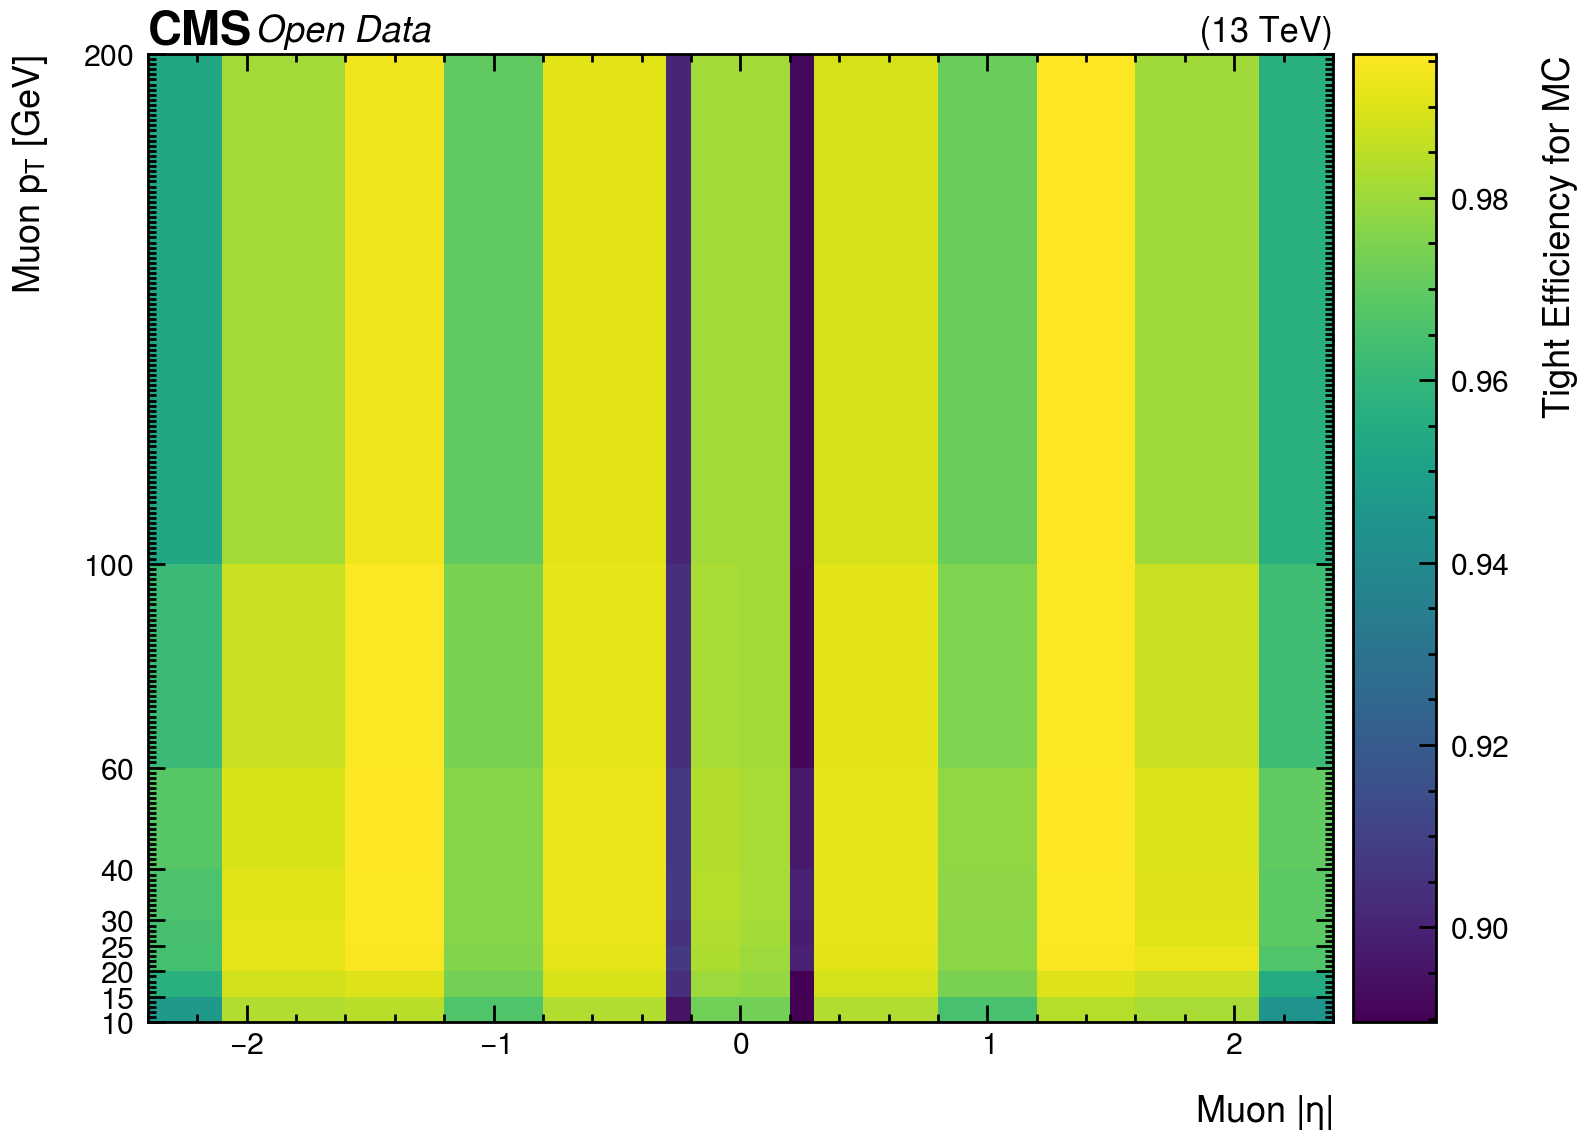

In [112]:

tight_effMC = tight['NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyMC'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(tight_effMC,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Tight Efficiency for MC", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()


In [113]:
print(tight_effMC.values())

[[0.94681561 0.9571346  0.96398777 0.96436793 0.9655422  0.96758771
  0.96163076 0.95296854]
 [0.98332381 0.98811525 0.9913246  0.99127501 0.99048555 0.98921055
  0.98670298 0.98092598]
 [0.98439252 0.99014008 0.99479526 0.99529266 0.99530768 0.99561149
  0.99518532 0.99361014]
 [0.96664929 0.97319388 0.97604007 0.97640043 0.97633612 0.97656375
  0.97453004 0.96992826]
 [0.98314023 0.98915684 0.9914856  0.99237591 0.99262822 0.99263442
  0.99192607 0.99087811]
 [0.89486021 0.9037047  0.90737152 0.9045555  0.90767092 0.90635282
  0.90374297 0.90118533]
 [0.97295099 0.98022914 0.98285246 0.9830507  0.98391443 0.98347282
  0.98175442 0.98089403]
 [0.97297955 0.97843146 0.98014981 0.98133999 0.98195881 0.98201114
  0.98090011 0.98111767]
 [0.88959712 0.8896144  0.89929074 0.89762115 0.8993333  0.89659715
  0.89143801 0.89197797]
 [0.9831298  0.98830527 0.99089009 0.99170643 0.99202353 0.99191588
  0.99114269 0.98909628]
 [0.9650417  0.97452968 0.97730631 0.97739196 0.97784996 0.97817737
  

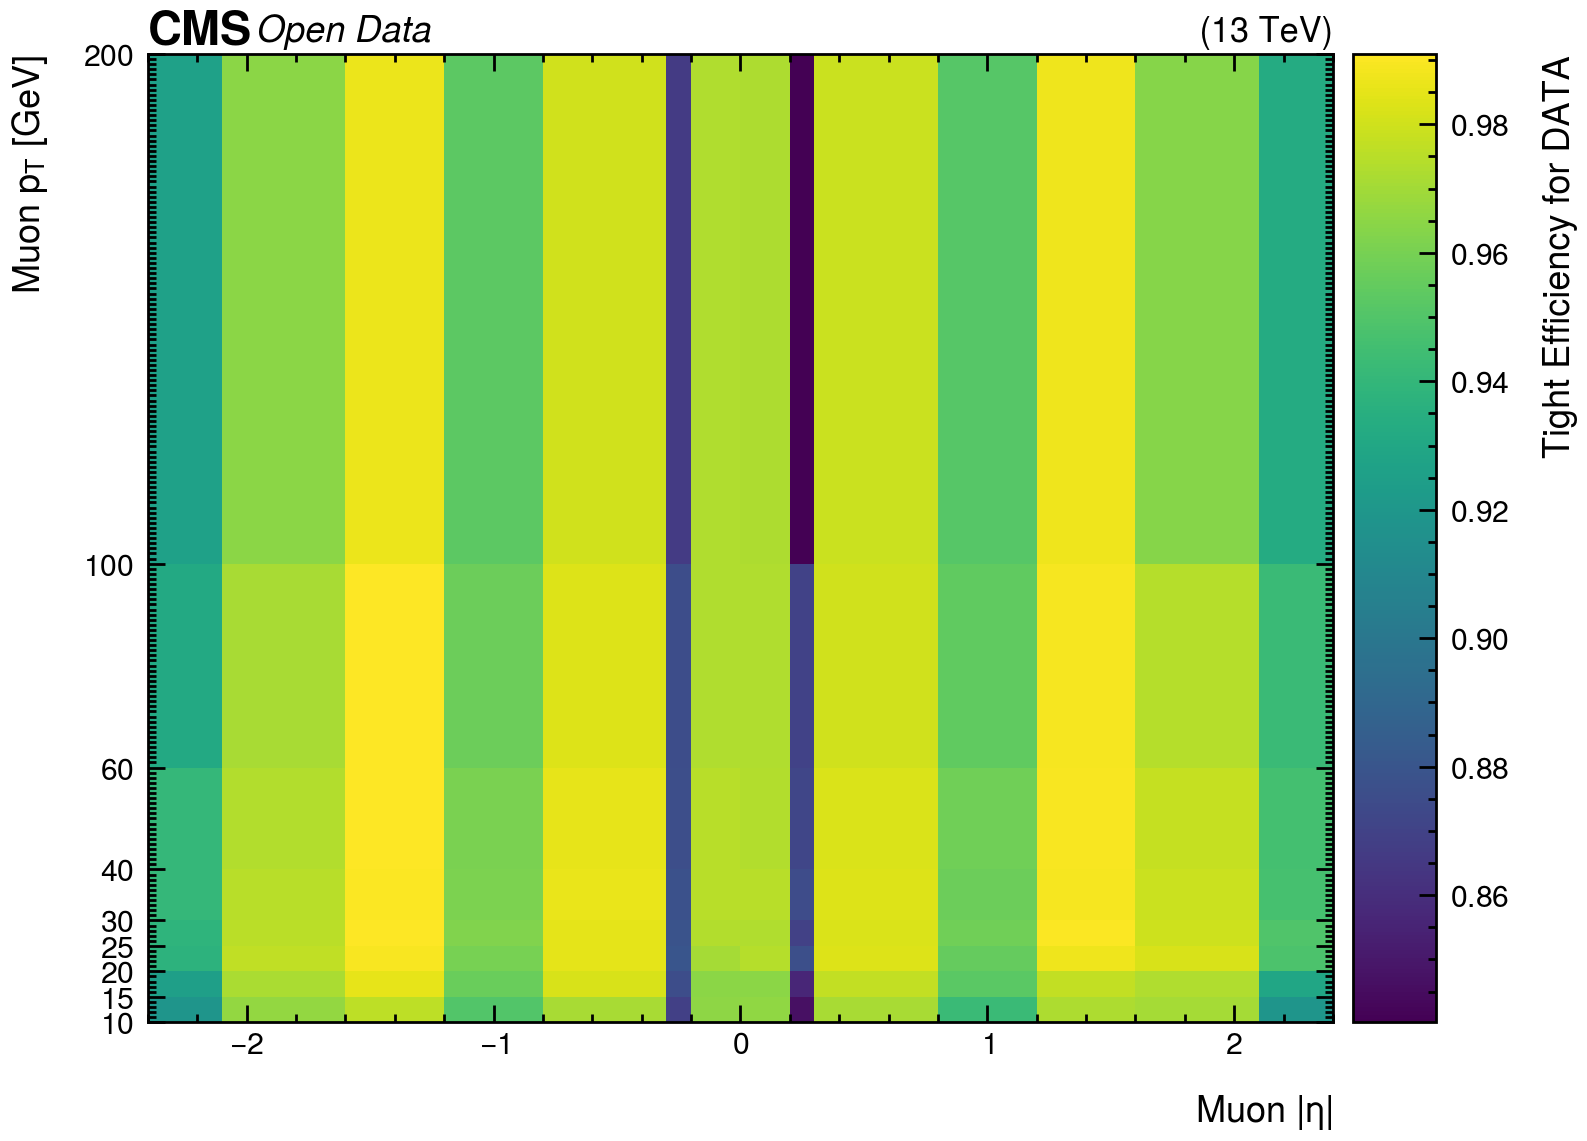

In [114]:
tight_eff_data = tight['NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(tight_eff_data,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Tight Efficiency for DATA", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()

In [115]:
print(tight_eff_data.values())

[[0.91892272 0.92467999 0.93691033 0.93840259 0.94038391 0.94032675
  0.93102866 0.9259674 ]
 [0.96639067 0.97208768 0.976749   0.97536087 0.97497195 0.97335702
  0.97101271 0.96449   ]
 [0.97577357 0.98557514 0.98950595 0.99082309 0.99029022 0.99095708
  0.99065858 0.98676455]
 [0.94977391 0.95639455 0.95999283 0.96237099 0.96136534 0.96061713
  0.95681399 0.95275426]
 [0.97129035 0.9817313  0.9848026  0.98469424 0.98568743 0.98529595
  0.98320282 0.97983754]
 [0.86859447 0.87545705 0.87968862 0.87880844 0.87788469 0.87563741
  0.87518996 0.86617464]
 [0.9654721  0.96447289 0.97075373 0.97347796 0.97495645 0.97475654
  0.97273195 0.97307658]
 [0.96568149 0.96479613 0.97390288 0.97312438 0.97454792 0.97330523
  0.97288185 0.97234076]
 [0.84627223 0.85636383 0.87626463 0.86953568 0.87449032 0.87164903
  0.86980027 0.84020662]
 [0.97107178 0.97738904 0.98275846 0.98258817 0.98278236 0.98247832
  0.97982997 0.97869104]
 [0.94213998 0.95235354 0.955589   0.95845366 0.95711863 0.95824796
  